 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [41]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [7]:
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)

sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [13]:
whale_returns_clean = whale_returns.dropna()
whale_returns_clean.drop_duplicates()
whale_returns_clean.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [14]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [16]:
# Drop nulls
whale_returns_clean = whale_returns.dropna()
whale_returns_clean.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [18]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_daily_returns = algo_returns.pct_change()

In [19]:
# Drop nulls
algo_returns_clean = algo_returns.dropna()

In [20]:
# Count nulls
algo_returns_clean.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [21]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [22]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [24]:
# Fix Data Types
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')

In [25]:
# Calculate Daily Returns
daily_returns_sp500 = sp500_history.astype(float).pct_change()
daily_returns_sp500.sort_index()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [26]:
# Drop nulls
daily_returns_sp500.dropna()
daily_returns_sp500.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [27]:
# Rename Column
daily_returns_sp500 = daily_returns_sp500.rename(columns={
    "Close": "S&P 500",})
daily_returns_sp500.head()

,S&P 500
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


## Combine Whale, Algorithmic, and S&P 500 Returns

In [28]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_returns_clean, algo_returns_clean, daily_returns_sp500], axis ="columns", join = "inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

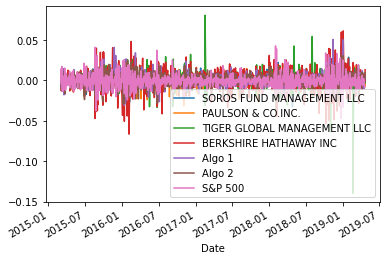

In [29]:
# Plot daily returns
combined_df.plot()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,1.004408
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,1.003208
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,1.017632
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,1.013634
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,1.031123
...,...,...,...,...,...,...,...
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.944990,1.267768,0.726708
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.924954,1.261140,0.725562
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.923823,1.259590,0.724829


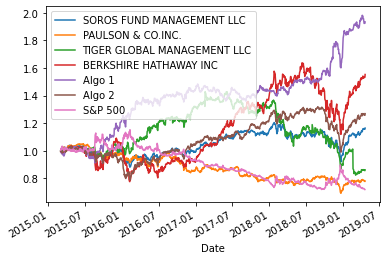

In [33]:
# Plot cumulative returns
cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.plot()
cumulative_returns

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

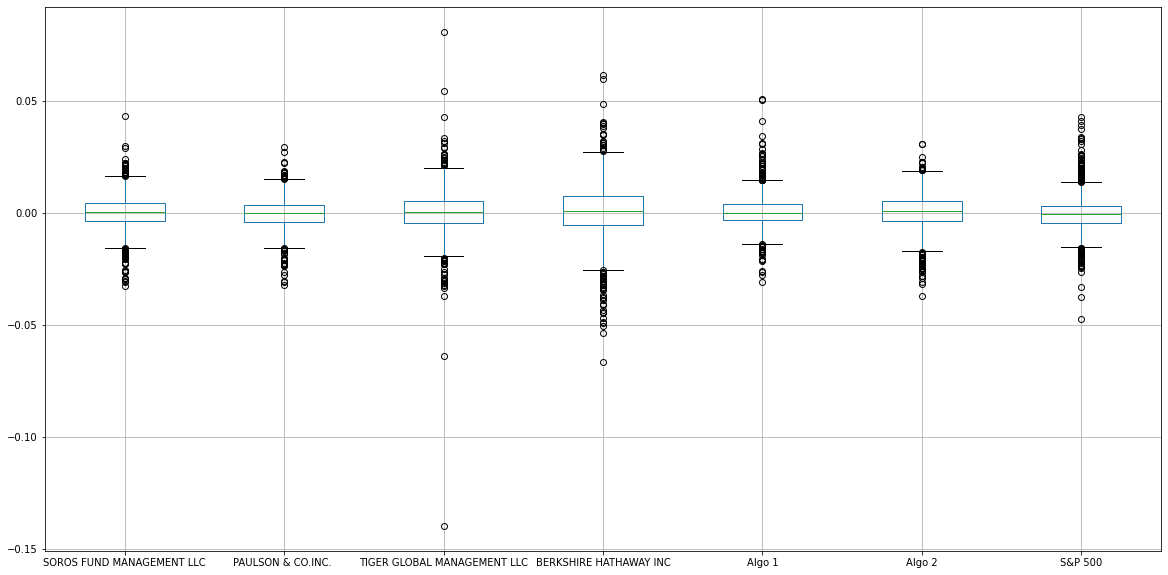

In [34]:
# Box plot to visually show risk
combined_df.boxplot(figsize = (20,10))

In [35]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008587
dtype: float64

In [ ]:
# Determine which portfolios are riskier than the S&P 500
By visual observation we can see that there are two portfolios that are riskier than the S&P 500.  Tiger Global Management(0.0109) and Berkshire Hathaway(0.0130)have higher standard deviations than the S&P(0.009)

In [36]:
# Calculate the annualized standard deviation (252 trading days)
annualized_varaince = (combined_df.var()*252)
annualized_std = np.sqrt(annualized_varaince)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

In [5]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combined_df.rolling(window=21).std().plot(figsize=(15,8), title = "Rolling Standard Deviations")

NameError: name 'combined_df' is not defined

In [2]:
# Construct a correlation table
correlation = combined_df.corr
correlation.style.background_gradient(cmap="summer")

NameError: name 'combined_df' is not defined

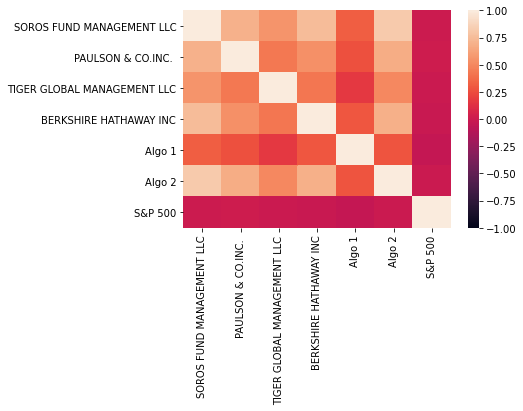

In [42]:
#heatmap
sns.heatmap(correlation, vmin=-1, vmax=1)

In [43]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
covariance = combined_df['BERKSHIRE HATHWAY INC'].cov(combined_df['S&P500'])
covariance


KeyError: 'BERKSHIRE HATHWAY INC'

In [ ]:
#variance = combined_df['BERKSHIRE HATHAWAY INC'].var()
#variance

In [ ]:
#ERK_beta = covariance / variance


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [44]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                       -0.518582
dtype: float64

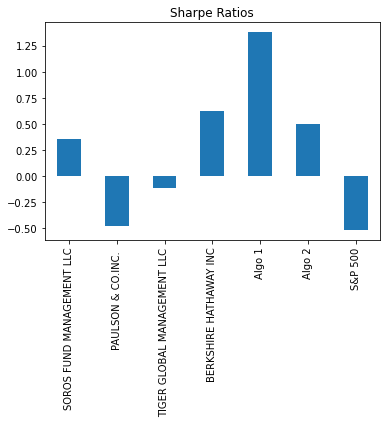

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [60]:
# Google stock
goog_csv = Path("Resources/GOOGL_data.csv")
goog_df = pd.read_csv(goog_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
goog_df.head()


,Close
Date,
2019-01-02 16:00:00,1054.68
2019-01-03 16:00:00,1025.47
2019-01-04 16:00:00,1078.07
2019-01-07 16:00:00,1075.92
2019-01-08 16:00:00,1085.37


In [65]:
# APPLE stock
aapl_csv = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename( columns={"Symbol": "AAPL1","NOCP":"AAPL"},inplace = True )
#aapl_df.drop(columns=['AAPL'], axis=1,inplace = True)
aapl_df

,AAPL1,AAPL
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [67]:
# COST stock
cost_csv = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename( columns={"Symbol": "COST1","NOCP":"COST"},inplace = True )
cost_df.drop(columns=['COST1'], axis=1,inplace = True)
cost_df.head()


,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [69]:
# Concatenate all stocks into a single DataFrame
combined_pt2 = pd.concat([goog_df,aapl_df,cost_df], axis='columns', join='inner')
combined_pt2.head()

,Close,AAPL1,AAPL,COST


In [70]:
# Reset the index
combined_pt2.sort_index(inplace=True)
combined_pt2.head()

,Close,AAPL1,AAPL,COST


In [ ]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [ ]:
# Drop Nulls
combined_pt2.dropna()
combined_pt2.head()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns = daily_returns.dot(weights)

custom = pd.DataFrame(portfolio_returns)
custom.head()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_pt3 = pd.concat([portfolio_returns, combined_df], axis='columns', join='inner')

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_pt3.rename(columns= {0: "Custom"},inplace = True )
combined_pt3.dropna(inplace=True)
combined_pt3.sort_index()
combined_pt3.head()

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
combined_pt3.std()
annualized_variance_pt2 = (combined_pt3.var()*252)
annualized_std_pt2 = np.sqrt(annualized_variance_pt2)
annualized_std_pt2

In [ ]:
# Rolling
rolling_variance = combined_pt3['Custom'].rolling(window=21).var()
rolling_covariance = combined_pt3['Custom'].rolling(window=21).cov(combined_pt3['S&P 500'])
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Custom Beta')

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios_all = (combined_pt3.mean() * 252) / ((combined_pt3).std() * np.sqrt(252))
sharpe_ratios_all

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind="bar", title="Sharpe Ratios")

In [ ]:
# Create a correlation analysis
correlation = combined_pt3.corr()
correlation

In [ ]:
#HeatMap
sns.heatmap(correlation, vmin=-1, vmax=1)

In [ ]:
# Beta
algo_SP500 = pd.concat([algo_returns_df, sp500_returns], axis='columns', join='inner')
algo_SP500 = algo_SP500.drop(columns = ['Algo 1'])
covariance = algo_SP500['Algo 2'].cov(algo_SP500['S&P 500'])
variance = algo_SP500['S&P 500'].var()
Algo2_beta = covariance / variance
Algo2_beta